Projekt MNwS - Aleksander Folfas 411052

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Zadanie 22

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w ANOVA i w teście Kruskala-Wallisa w przypadku, gdy generowane dane nie pochodzą z
rozkładu normalnego (ale spełniają pozostała założenia ANOVA). W tym celu można wygenerować
trzy próbki danych z tego samego rozkładu t-Studenta.
Uzyskane wyniki należy opisać w zależności od:
- liczebności generowanych próbek,
- liczby stopni swobody generowanego rozkładu 𝑡-Studenta (proszę pamiętać, że od stopni swobody
zależy odchylenie standardowe).

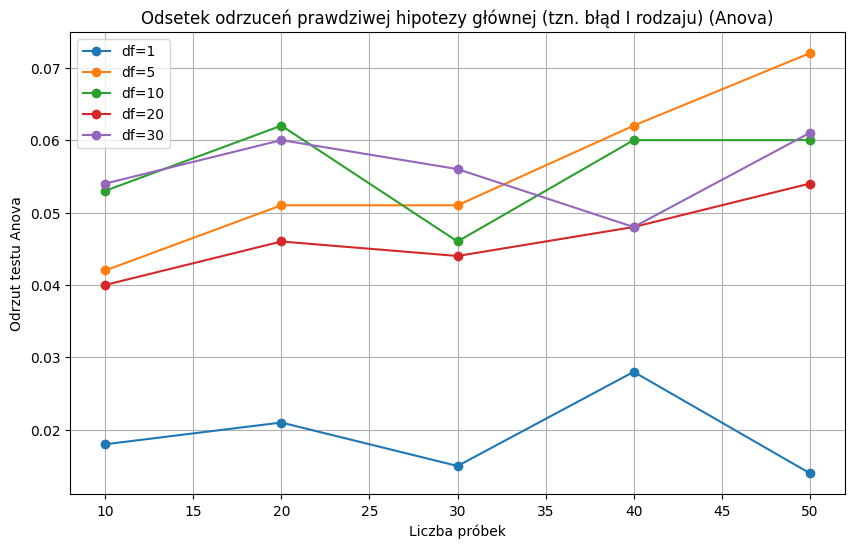

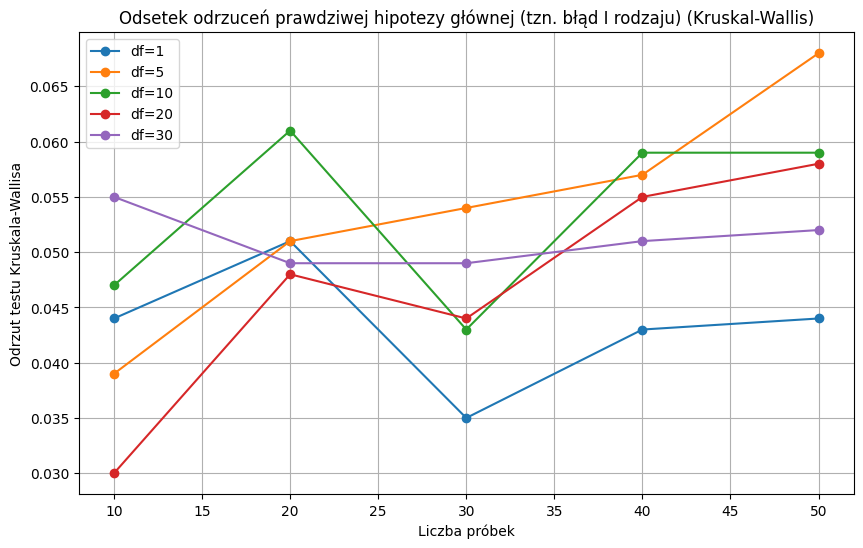

In [6]:
def rejection_rate_anova(n_samples, df, n_simulations=1000):
    anova_rejections = 0
    kruskal_rejections = 0

    for _ in range(n_simulations):
        # Generowanie trzech próbek danych z rozkładu t-Studenta
        samples = [np.random.standard_t(df, size=n_samples) for _ in range(3)]

        # Test ANOVA
        _, anova_pvalue = stats.f_oneway(*samples)
        if anova_pvalue < 0.05:
            anova_rejections += 1

        # Test Kruskala-Wallisa
        _, kruskal_pvalue = stats.kruskal(*samples)
        if kruskal_pvalue < 0.05:
            kruskal_rejections += 1

    anova_rejection_rate = anova_rejections / n_simulations
    kruskal_rejection_rate = kruskal_rejections / n_simulations

    return anova_rejection_rate, kruskal_rejection_rate

# Parametry symulacji
n_samples_range = [10, 20, 30, 40, 50]
df_range = [1, 5, 10, 20, 30]
np.random.seed(411052)

anova_rejection_rates = np.zeros((len(n_samples_range), len(df_range)))
kruskal_rejection_rates = np.zeros((len(n_samples_range), len(df_range)))

# Symulacje dla różnych wartości liczebności próbek i stopni swobody rozkładu t-Studenta
for i, n_samples in enumerate(n_samples_range):
    for j, df in enumerate(df_range):
        anova_rejection_rate, kruskal_rejection_rate = rejection_rate_anova(n_samples, df)
        anova_rejection_rates[i, j] = anova_rejection_rate
        kruskal_rejection_rates[i, j] = kruskal_rejection_rate

# Wykresy dla testu Anova
plt.figure(figsize=(10, 6))
for j, df in enumerate(df_range):
    plt.plot(n_samples_range, anova_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Anova')
plt.title('Odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) (Anova)')
plt.legend()
plt.grid(True)
plt.show()

#Wykreślenie dla testu Kruskala-Wallisa
plt.figure(figsize=(10, 6))
for j, df in enumerate(df_range):
    plt.plot(n_samples_range, kruskal_rejection_rates[:, j], '-o', label=f'df={df}')
plt.xlabel('Liczba próbek')
plt.ylabel('Odrzut testu Kruskala-Wallisa')
plt.title('Odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) (Kruskal-Wallis)')
plt.legend()
plt.grid(True)
plt.show()
